# AI-based Surveying the Impact of Environmental, Climatic, Economic and Demographic Conditions on the Epidemic Outbreak Rate of COVID-19

$Mehryar{\,}Majd$, $Ramin{\,}Mousa$ \& $Arsalan{\,}Mousazadeh$

__Abstract:__ This study aims to have an analytical and predictive approach to the growth rate and spread of the first wave of COVID-19 infection and mainly focuses on its dependency on other global factors in affected countries via Artificial Intelligence-based processing of fatality data/statistics. Fatality, infected, and recovered cases in the form of the time-series data was acquired through the World Health Organization (WHO) & the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Recorded health data subsequently was analyzed by several Deep Neural Network (DNN) models to create a better intuition of epidemic outbreak rate of COVID-19. Monitoring spreading trend changes becomes more feasible via continuous observation of statistical pattern and integrating the other datasets with more global features count as factors influencing the local conditions on historical data conveys pivotal information concerning learning the pattern of epidemic progression. In this study, attention-based Sequence-to-Sequence (Seq2Seq) models empowered by Long-Short Term Memory (LSTM) and Gated Recurrent Unit (GRU) units, were deployed to predict mortality rate. Ultimately these analyses are utilized to monitor infection behaviour on time-series data and were subsequently assessed for their performance to predict the behaviour of the first wave of COVID-19 outbreak rate intensely. Demographic & environmental conditions have likely been influenced significantly to shape the reliable predictive learning algorithms for long-duration risk of COVID-19 pandemic.

### Data Analysis of COVID-19 for __Italy__ ![](http://flagpedia.net/data/flags/small/it.png)  
__Attention-based Sequence-to-Sequence (Seq2Seq) model__

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from matplotlib import pyplot as plt
import os
for dirname, _, filenames in os.walk('novel-corona-virus/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


novel-corona-virus/time_series_covid_19_confirmed.csv
novel-corona-virus/COVID19_open_line_list.csv
novel-corona-virus/countries of the world.csv
novel-corona-virus/time_series_covid_19_recovered.csv
novel-corona-virus/covid_19_data.csv
novel-corona-virus/COVID19_line_list_data.csv
novel-corona-virus/time_series_covid_19_deaths.csv
novel-corona-virus/sars_2003_complete_dataset_clean.csv


In [5]:
#df_covid_19 = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv')
df_covid_19 = pd.read_csv("novel-corona-virus/covid_19_data.csv")
df_covid_19['Date'] = pd.to_datetime(df_covid_19['ObservationDate'])
df_covid_19['Outbreak'] = 'COVID_2019'
df_covid_19.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'Date', 'Outbreak'],
      dtype='object')

In [6]:
df_covid_19 = df_covid_19[df_covid_19["Country/Region"]=="Italy"]

In [7]:
df_covid_19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Outbreak
480,481,01/31/2020,NaN,Italy,1/31/2020 23:59,2.0,0.0,0.0,2020-01-31,COVID_2019
539,540,02/01/2020,NaN,Italy,1/31/2020 8:15,2.0,0.0,0.0,2020-02-01,COVID_2019
608,609,02/02/2020,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2020-02-02,COVID_2019
675,676,02/03/2020,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2020-02-03,COVID_2019
743,744,02/04/2020,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2020-02-04,COVID_2019


# Only Coid dataset

In [8]:
df_sars_03 = pd.read_csv("novel-corona-virus/sars_2003_complete_dataset_clean.csv")
df_sars_03['Date'] = pd.to_datetime(df_sars_03['Date'])
df_sars_03['Province/State'] = None
df_sars_03['Outbreak'] = 'SARS_2003'
print(df_sars_03.columns)
df_sars_03.rename({'Cumulative number of case(s)':'Confirmed', 'Number of deaths':'Deaths', 'Number recovered':'Recovered', 'Country':'Country/Region'},axis=1,inplace=True)

Index(['Date', 'Country', 'Cumulative number of case(s)', 'Number of deaths',
       'Number recovered', 'Province/State', 'Outbreak'],
      dtype='object')


In [9]:
df_sars_03 = df_sars_03[df_sars_03["Country/Region"]=="Italy"]
df_sars_03.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Province/State,Outbreak
46,2003-03-21,Italy,1,0,0,None,SARS_2003
61,2003-03-22,Italy,2,0,0,None,SARS_2003
77,2003-03-24,Italy,2,0,0,None,SARS_2003
92,2003-03-25,Italy,2,0,0,None,SARS_2003
107,2003-03-26,Italy,3,0,0,None,SARS_2003


In [10]:
templ_cols = ['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']
df = pd.concat([df_covid_19[templ_cols], df_sars_03[templ_cols]])
df = df.reset_index(drop=True)


In [11]:
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Province/State'] = df['Province/State'].fillna('Others')
df = df.sort_values(['Country/Region','Province/State','Date'])
df.head()

,Outbreak,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
46,SARS_2003,Others,Italy,2003-03-21,1.0,0.0,0.0
47,SARS_2003,Others,Italy,2003-03-22,2.0,0.0,0.0
48,SARS_2003,Others,Italy,2003-03-24,2.0,0.0,0.0
49,SARS_2003,Others,Italy,2003-03-25,2.0,0.0,0.0
50,SARS_2003,Others,Italy,2003-03-26,3.0,0.0,0.0


In [12]:
t = df.groupby(['Outbreak','Country/Region','Province/State']).agg({'Confirmed':'max'})
t = t.loc[t['Confirmed'] >=0]
df = pd.merge(df,t[[]],left_on=['Outbreak','Country/Region','Province/State'], right_index=True)


In [13]:
df['Province/State'] = df['Province/State'].astype('category')
df['Country/Region'] = df['Country/Region'].astype('category')
df['Outbreak'] = df['Outbreak'].astype('category')
df['Province/State'] = df['Province/State'].cat.codes
df['Country/Region'] = df['Country/Region'].cat.codes
df['Outbreak'] = df['Outbreak'].cat.codes
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df.head(2)

,Outbreak,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered,Month,Week
46,1,0,0,2003-03-21,1.0,0.0,0.0,3,12
47,1,0,0,2003-03-22,2.0,0.0,0.0,3,12


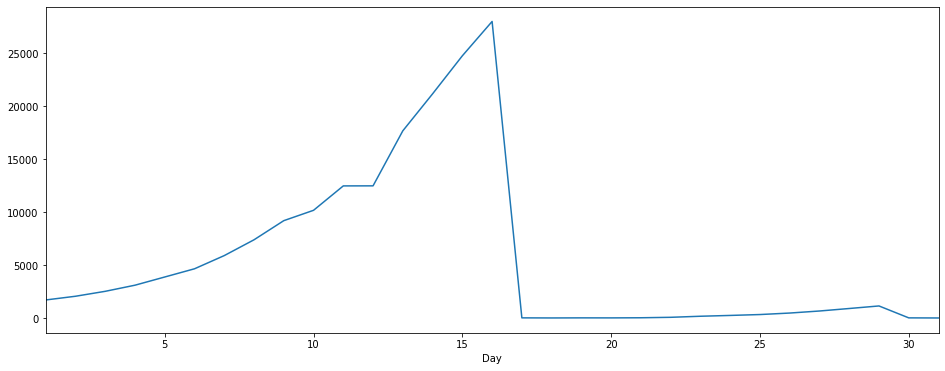

In [14]:
df['Day'] = df['Date'].apply(lambda x:x.day)
df['Hour'] = df['Date'].apply(lambda x:x.hour)
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,6))
df.groupby('Day').sum()['Confirmed'].plot()

In [15]:
df=df[[ 'Province/State', 'Country/Region', 'Day','Confirmed','Deaths','Recovered']]

In [16]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM,GRU
from keras.layers import Dense
def load_data(data, time_step=2, after_day=1, validate_percent=0.67):
    seq_length = time_step + after_day
    result = []
    for index in range(len(data) - seq_length + 1):
        result.append(data[index: index + seq_length])
    result = np.array(result)
    print('total data: ', result.shape)

    train_size = int(len(result) * validate_percent)
    train = result[:train_size, :]
    validate = result[train_size:, :]

    x_train = train[:, :time_step]
    y_train = train[:, time_step:]
    x_validate = validate[:, :time_step]
    y_validate = validate[:, time_step:]
    
     

    return [x_train, y_train, x_validate, y_validate]

Using TensorFlow backend.


In [17]:
def base_model(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    model.add(Dropout(0.50))
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.50))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    model.add(Dropout(0.50))
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(Dropout(0.50))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model

def seq2seq(feature_len=1, after_day=1, input_shape=(8, 1)):
    '''
    Encoder:
    X = Input sequence
    C = LSTM(X); The context vector

    Decoder:
    y(t) = LSTM(s(t-1), y(t-1)); where s is the hidden state of the LSTM(h and c)
    y(0) = LSTM(s0, C); C is the context vector from the encoder.
    '''

    # Encoder
    encoder_inputs = Input(shape=input_shape) # (timesteps, feature)
    encoder = LSTM(units=100,dropout=0.5 ,return_state=True,  name='encoder')
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    states = [state_h, state_c]

    # Decoder
    reshapor = Reshape((1, 100), name='reshapor')
    decoder = LSTM(units=100, dropout=0.5 ,return_sequences=True, return_state=True, name='decoder')

    # Densor
    #tdensor = TimeDistributed(Dense(units=200, activation='linear', name='time_densor'))
    densor_output = Dense(units=feature_len, activation='linear', name='output')

    inputs = reshapor(encoder_outputs)
    #inputs = tdensor(inputs)
    all_outputs = []



    for _ in range(after_day):
        outputs, h, c = decoder(inputs, initial_state=states)

        #inputs = tdensor(outputs)
        inputs = outputs
        states = [state_h, state_c]

        outputs = densor_output(outputs)
        all_outputs.append(outputs)

    decoder_outputs = Lambda(lambda x: K.concatenate(x, axis=1))(all_outputs)
    model = Model(inputs=encoder_inputs, outputs=decoder_outputs)

    return model

In [28]:
def normalize_data(data, scaler, feature_len):
    minmaxscaler = scaler.fit(data)
    normalize_data = minmaxscaler.transform(data)
    return normalize_data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=2, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (133, 6, 6)
train data:  (106, 2, 6) (106, 4, 6)
validate data:  (27, 2, 6) (27, 4, 6)


In [19]:
from keras import backend as K
from keras.models import Sequential, load_model, Model
from keras.layers import LSTM, Dense, Activation, TimeDistributed, Dropout, Lambda, RepeatVector, Input, Reshape
from keras.callbacks import ModelCheckpoint

In [20]:
 # model complie
from keras.optimizers import SGD,Adam
# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
input_shape = (2, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Instructions for updating:
Use tf.cast instead.
Train on 106 samples, validate on 27 samples
Epoch 1/100
106/106 [==============================] - 2s 15ms/step - loss: 0.0489 - acc: 0.1675 - rmse: 0.1852 - mse: 0.0489 - r_square: -0.1229 - val_loss: 0.0827 - val_acc: 0.4630 - val_rmse: 0.2531 - val_mse: 0.0827 - val_r_square: -0.3202
Epoch 2/100
106/106 [==============================] - 0s 243us/step - loss: 0.0469 - acc: 0.5542 - rmse: 0.1807 - mse: 0.0469 - r_square: -0.0768 - val_loss: 0.0806 - val_acc: 0.4630 - val_rmse: 0.2495 - val_mse: 0.0806 - val_r_square: -0.2870
Epoch 3/100
106/106 [==============================] - 0s 260us/step - loss: 0.0448 - acc: 0.8302 - rmse: 0.1763 - mse: 0.0448 - r_square: -0.0286 - val_loss: 0.0787 - val_acc: 0.4630 - val_rmse: 0.2465 - val_mse: 0.0787 - val_r_square: -0.2572
Epoch 4/100
106/106 [==============================] - 0s 218us/step - loss: 0.0434 - acc: 0.9057 - rmse: 0.1731 - mse: 0.0434 - r_square: 0.0035 - val_loss: 0.0768 - val_ac

Epoch 34/100
106/106 [==============================] - 0s 278us/step - loss: 0.0198 - acc: 0.9623 - rmse: 0.1159 - mse: 0.0198 - r_square: 0.5448 - val_loss: 0.0513 - val_acc: 0.4630 - val_rmse: 0.1916 - val_mse: 0.0513 - val_r_square: 0.1805
Epoch 35/100
106/106 [==============================] - 0s 303us/step - loss: 0.0199 - acc: 0.9623 - rmse: 0.1154 - mse: 0.0199 - r_square: 0.5433 - val_loss: 0.0514 - val_acc: 0.4630 - val_rmse: 0.1922 - val_mse: 0.0514 - val_r_square: 0.1793
Epoch 36/100
106/106 [==============================] - 0s 323us/step - loss: 0.0193 - acc: 0.9623 - rmse: 0.1155 - mse: 0.0193 - r_square: 0.5568 - val_loss: 0.0514 - val_acc: 0.4630 - val_rmse: 0.1926 - val_mse: 0.0514 - val_r_square: 0.1787
Epoch 37/100
106/106 [==============================] - 0s 271us/step - loss: 0.0196 - acc: 0.9623 - rmse: 0.1153 - mse: 0.0196 - r_square: 0.5497 - val_loss: 0.0514 - val_acc: 0.4630 - val_rmse: 0.1929 - val_mse: 0.0514 - val_r_square: 0.1782
Epoch 38/100
106/106 [==

Epoch 68/100
106/106 [==============================] - 0s 207us/step - loss: 0.0157 - acc: 0.9623 - rmse: 0.1036 - mse: 0.0157 - r_square: 0.6389 - val_loss: 0.0488 - val_acc: 0.4630 - val_rmse: 0.1837 - val_mse: 0.0488 - val_r_square: 0.2212
Epoch 69/100
106/106 [==============================] - 0s 190us/step - loss: 0.0175 - acc: 0.9623 - rmse: 0.1080 - mse: 0.0175 - r_square: 0.5989 - val_loss: 0.0487 - val_acc: 0.4630 - val_rmse: 0.1835 - val_mse: 0.0487 - val_r_square: 0.2223
Epoch 70/100
106/106 [==============================] - 0s 196us/step - loss: 0.0162 - acc: 0.9623 - rmse: 0.1043 - mse: 0.0162 - r_square: 0.6274 - val_loss: 0.0486 - val_acc: 0.4630 - val_rmse: 0.1833 - val_mse: 0.0486 - val_r_square: 0.2237
Epoch 71/100
106/106 [==============================] - 0s 181us/step - loss: 0.0172 - acc: 0.9623 - rmse: 0.1077 - mse: 0.0172 - r_square: 0.6045 - val_loss: 0.0485 - val_acc: 0.4630 - val_rmse: 0.1831 - val_mse: 0.0485 - val_r_square: 0.2248
Epoch 72/100
106/106 [==

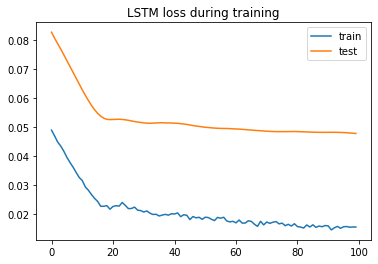

In [22]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("LSTM loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.01331852 MSE (0.11540590 RMSE ) , 96.22641498  ACC
Validation Score: 0.04774478 MSE (0.21850578 RMSE ) , 46.29629652  ACC


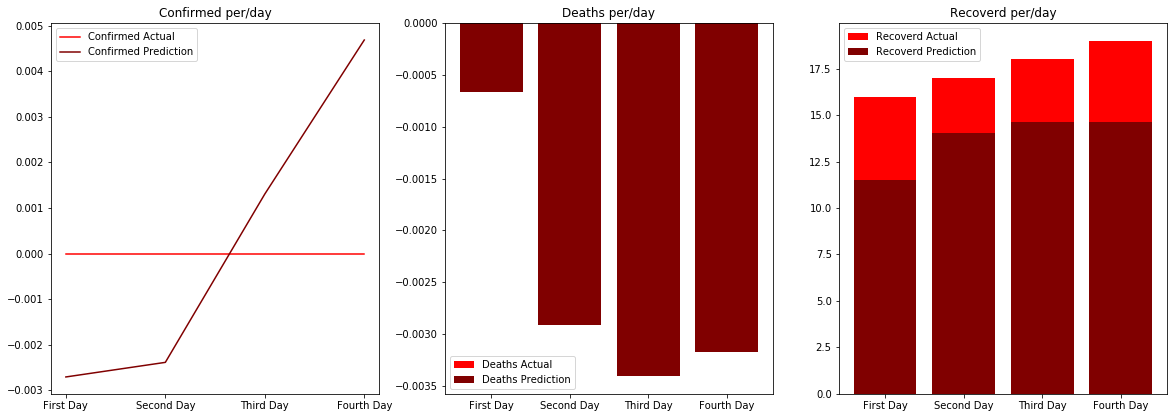

In [23]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# Seq2Seq

In [25]:
input_shape = (2, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 106 samples, validate on 27 samples
Epoch 1/100
106/106 [==============================] - 4s 41ms/step - loss: 0.0478 - acc: 0.4670 - rmse: 0.1841 - mse: 0.0478 - r_square: -0.0978 - val_loss: 0.0797 - val_acc: 0.4630 - val_rmse: 0.2498 - val_mse: 0.0797 - val_r_square: -0.2733
Epoch 2/100
106/106 [==============================] - 0s 250us/step - loss: 0.0448 - acc: 0.9623 - rmse: 0.1768 - mse: 0.0448 - r_square: -0.0294 - val_loss: 0.0768 - val_acc: 0.4630 - val_rmse: 0.2447 - val_mse: 0.0768 - val_r_square: -0.2266
Epoch 3/100
106/106 [==============================] - 0s 411us/step - loss: 0.0417 - acc: 0.9623 - rmse: 0.1705 - mse: 0.0417 - r_square: 0.0415 - val_loss: 0.0742 - val_acc: 0.4630 - val_rmse: 0.2402 - val_mse: 0.0742 - val_r_square: -0.1852
Epoch 4/100
106/106 [==============================] - 0s 343us/step - loss: 0.0410 - acc: 0.9623 - rmse: 0.1677 - mse: 0.0410 - r_square: 0.0592 - val_loss: 0.0714 - val_acc: 0.4630 - val_rmse: 0.2355 - val_mse: 0.0714 - 

Epoch 35/100
106/106 [==============================] - 0s 266us/step - loss: 0.0156 - acc: 0.9623 - rmse: 0.0946 - mse: 0.0156 - r_square: 0.6429 - val_loss: 0.0468 - val_acc: 0.4630 - val_rmse: 0.1828 - val_mse: 0.0468 - val_r_square: 0.2529
Epoch 36/100
106/106 [==============================] - 0s 256us/step - loss: 0.0154 - acc: 0.9623 - rmse: 0.0944 - mse: 0.0154 - r_square: 0.6471 - val_loss: 0.0468 - val_acc: 0.4630 - val_rmse: 0.1828 - val_mse: 0.0468 - val_r_square: 0.2517
Epoch 37/100
106/106 [==============================] - 0s 237us/step - loss: 0.0157 - acc: 0.9623 - rmse: 0.0962 - mse: 0.0157 - r_square: 0.6386 - val_loss: 0.0469 - val_acc: 0.4630 - val_rmse: 0.1828 - val_mse: 0.0469 - val_r_square: 0.2505
Epoch 38/100
106/106 [==============================] - 0s 246us/step - loss: 0.0178 - acc: 0.9623 - rmse: 0.1040 - mse: 0.0178 - r_square: 0.5905 - val_loss: 0.0470 - val_acc: 0.4630 - val_rmse: 0.1828 - val_mse: 0.0470 - val_r_square: 0.2493
Epoch 39/100
106/106 [==

Epoch 69/100
106/106 [==============================] - 0s 276us/step - loss: 0.0140 - acc: 0.9623 - rmse: 0.1009 - mse: 0.0140 - r_square: 0.6783 - val_loss: 0.0491 - val_acc: 0.4630 - val_rmse: 0.1863 - val_mse: 0.0491 - val_r_square: 0.2153
Epoch 70/100
106/106 [==============================] - 0s 242us/step - loss: 0.0151 - acc: 0.9623 - rmse: 0.1053 - mse: 0.0151 - r_square: 0.6527 - val_loss: 0.0491 - val_acc: 0.4630 - val_rmse: 0.1862 - val_mse: 0.0491 - val_r_square: 0.2155
Epoch 71/100
106/106 [==============================] - 0s 241us/step - loss: 0.0144 - acc: 0.9623 - rmse: 0.1020 - mse: 0.0144 - r_square: 0.6693 - val_loss: 0.0491 - val_acc: 0.4630 - val_rmse: 0.1860 - val_mse: 0.0491 - val_r_square: 0.2157
Epoch 72/100
106/106 [==============================] - 0s 259us/step - loss: 0.0147 - acc: 0.9623 - rmse: 0.1028 - mse: 0.0147 - r_square: 0.6622 - val_loss: 0.0491 - val_acc: 0.4630 - val_rmse: 0.1859 - val_mse: 0.0491 - val_r_square: 0.2160
Epoch 73/100
106/106 [==

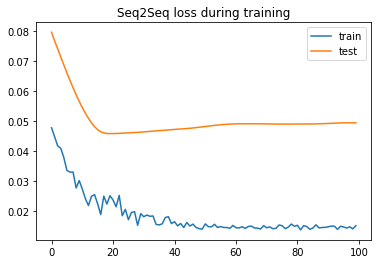

In [26]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Seq2Seq loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.01406003 MSE (0.11857499 RMSE ) , 96.22641498  ACC
Validation Score: 0.04947731 MSE (0.22243495 RMSE ) , 46.29629652  ACC


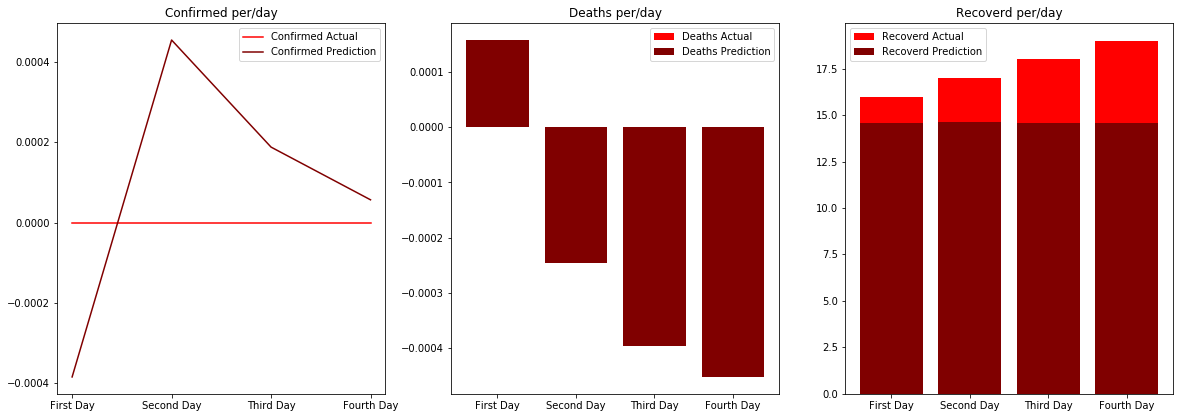

In [27]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# GRU

In [29]:
input_shape = (2, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 106 samples, validate on 27 samples
Epoch 1/100
106/106 [==============================] - 2s 22ms/step - loss: 0.0497 - acc: 0.1439 - rmse: 0.1924 - mse: 0.0497 - r_square: -0.1409 - val_loss: 0.0783 - val_acc: 0.4630 - val_rmse: 0.2468 - val_mse: 0.0783 - val_r_square: -0.2514
Epoch 2/100
106/106 [==============================] - 0s 126us/step - loss: 0.0443 - acc: 0.4953 - rmse: 0.1808 - mse: 0.0443 - r_square: -0.0164 - val_loss: 0.0735 - val_acc: 0.4630 - val_rmse: 0.2388 - val_mse: 0.0735 - val_r_square: -0.1735
Epoch 3/100
106/106 [==============================] - 0s 247us/step - loss: 0.0400 - acc: 0.7005 - rmse: 0.1725 - mse: 0.0400 - r_square: 0.0819 - val_loss: 0.0691 - val_acc: 0.4630 - val_rmse: 0.2316 - val_mse: 0.0691 - val_r_square: -0.1037
Epoch 4/100
106/106 [==============================] - 0s 204us/step - loss: 0.0350 - acc: 0.8349 - rmse: 0.1613 - mse: 0.0350 - r_square: 0.1960 - val_loss: 0.0654 - val_acc: 0.4630 - val_rmse: 0.2251 - val_mse: 0.0654 - 

Epoch 35/100
106/106 [==============================] - 0s 157us/step - loss: 0.0193 - acc: 0.9623 - rmse: 0.1134 - mse: 0.0193 - r_square: 0.5567 - val_loss: 0.0505 - val_acc: 0.4630 - val_rmse: 0.1883 - val_mse: 0.0505 - val_r_square: 0.1935
Epoch 36/100
106/106 [==============================] - 0s 206us/step - loss: 0.0201 - acc: 0.9623 - rmse: 0.1172 - mse: 0.0201 - r_square: 0.5387 - val_loss: 0.0503 - val_acc: 0.4630 - val_rmse: 0.1876 - val_mse: 0.0503 - val_r_square: 0.1965
Epoch 37/100
106/106 [==============================] - 0s 187us/step - loss: 0.0187 - acc: 0.9623 - rmse: 0.1113 - mse: 0.0187 - r_square: 0.5697 - val_loss: 0.0501 - val_acc: 0.4630 - val_rmse: 0.1869 - val_mse: 0.0501 - val_r_square: 0.1993
Epoch 38/100
106/106 [==============================] - 0s 156us/step - loss: 0.0187 - acc: 0.9623 - rmse: 0.1124 - mse: 0.0187 - r_square: 0.5700 - val_loss: 0.0500 - val_acc: 0.4630 - val_rmse: 0.1861 - val_mse: 0.0500 - val_r_square: 0.2019
Epoch 39/100
106/106 [==

Epoch 69/100
106/106 [==============================] - 0s 165us/step - loss: 0.0166 - acc: 0.9623 - rmse: 0.1050 - mse: 0.0166 - r_square: 0.6189 - val_loss: 0.0487 - val_acc: 0.4630 - val_rmse: 0.1816 - val_mse: 0.0487 - val_r_square: 0.2217
Epoch 70/100
106/106 [==============================] - 0s 186us/step - loss: 0.0162 - acc: 0.9623 - rmse: 0.1025 - mse: 0.0162 - r_square: 0.6283 - val_loss: 0.0488 - val_acc: 0.4630 - val_rmse: 0.1817 - val_mse: 0.0488 - val_r_square: 0.2212
Epoch 71/100
106/106 [==============================] - 0s 152us/step - loss: 0.0158 - acc: 0.9623 - rmse: 0.1039 - mse: 0.0158 - r_square: 0.6372 - val_loss: 0.0488 - val_acc: 0.4630 - val_rmse: 0.1816 - val_mse: 0.0488 - val_r_square: 0.2211
Epoch 72/100
106/106 [==============================] - 0s 177us/step - loss: 0.0147 - acc: 0.9623 - rmse: 0.1000 - mse: 0.0147 - r_square: 0.6635 - val_loss: 0.0488 - val_acc: 0.4630 - val_rmse: 0.1814 - val_mse: 0.0488 - val_r_square: 0.2213
Epoch 73/100
106/106 [==

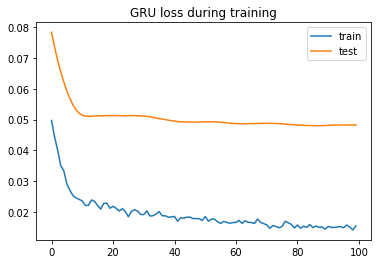

In [30]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("GRU loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.01241402 MSE (0.11141822 RMSE ) , 96.22641498  ACC
Validation Score: 0.04820505 MSE (0.21955649 RMSE ) , 46.29629652  ACC


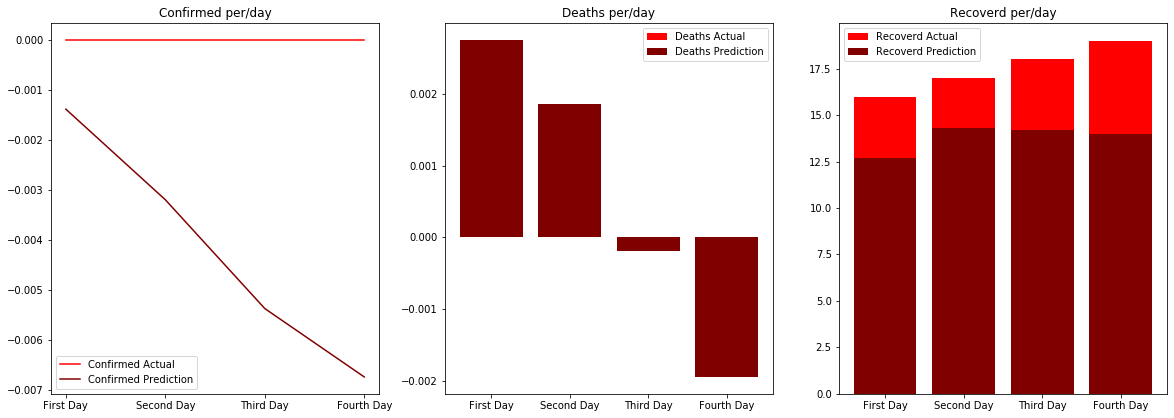

In [31]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# Only  Covid data

In [32]:
df_covid_19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Outbreak
480,481,01/31/2020,NaN,Italy,1/31/2020 23:59,2.0,0.0,0.0,2020-01-31,COVID_2019
539,540,02/01/2020,NaN,Italy,1/31/2020 8:15,2.0,0.0,0.0,2020-02-01,COVID_2019
608,609,02/02/2020,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2020-02-02,COVID_2019
675,676,02/03/2020,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2020-02-03,COVID_2019
743,744,02/04/2020,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2020-02-04,COVID_2019


In [33]:
df=df_covid_19
df['Province/State'] = df['Province/State'].astype('category')
df['Country/Region'] = df['Country/Region'].astype('category')
df['Outbreak'] = df['Outbreak'].astype('category')
df['Province/State'] = df['Province/State'].cat.codes
df['Country/Region'] = df['Country/Region'].cat.codes
df['Outbreak'] = df['Outbreak'].cat.codes

In [34]:
df=df[[ 'Province/State', 'Country/Region', 'Confirmed','Deaths','Recovered']]

In [43]:
def normalize_data(data, scaler, feature_len):
    minmaxscaler = scaler.fit(data)
    normalize_data = minmaxscaler.transform(data)
    return normalize_data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=2, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (41, 6, 5)
train data:  (32, 2, 5) (32, 4, 5)
validate data:  (9, 2, 5) (9, 4, 5)


In [36]:
input_shape = (2, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 32 samples, validate on 9 samples
Epoch 1/100
32/32 [==============================] - 3s 84ms/step - loss: 9.5382e-04 - acc: 0.2188 - rmse: 0.0135 - mse: 9.5382e-04 - r_square: -0.1155 - val_loss: 0.1224 - val_acc: 0.2500 - val_rmse: 0.3066 - val_mse: 0.1224 - val_r_square: -0.7543
Epoch 2/100
32/32 [==============================] - 0s 489us/step - loss: 8.5650e-04 - acc: 0.7344 - rmse: 0.0145 - mse: 8.5650e-04 - r_square: -0.0017 - val_loss: 0.1196 - val_acc: 0.3333 - val_rmse: 0.3023 - val_mse: 0.1196 - val_r_square: -0.7129
Epoch 3/100
32/32 [==============================] - 0s 593us/step - loss: 7.6901e-04 - acc: 0.7812 - rmse: 0.0155 - mse: 7.6901e-04 - r_square: 0.1007 - val_loss: 0.1167 - val_acc: 0.4167 - val_rmse: 0.2981 - val_mse: 0.1167 - val_r_square: -0.6723
Epoch 4/100
32/32 [==============================] - 0s 534us/step - loss: 7.4396e-04 - acc: 0.7344 - rmse: 0.0170 - mse: 7.4396e-04 - r_square: 0.1300 - val_loss: 0.1141 - val_acc: 0.4722 - val_rmse: 0.294

Epoch 34/100
32/32 [==============================] - 0s 728us/step - loss: 4.9700e-04 - acc: 0.8125 - rmse: 0.0156 - mse: 4.9700e-04 - r_square: 0.4188 - val_loss: 0.0731 - val_acc: 0.8333 - val_rmse: 0.2356 - val_mse: 0.0731 - val_r_square: -0.0473
Epoch 35/100
32/32 [==============================] - 0s 555us/step - loss: 5.2184e-04 - acc: 0.7422 - rmse: 0.0162 - mse: 5.2184e-04 - r_square: 0.3897 - val_loss: 0.0710 - val_acc: 0.8333 - val_rmse: 0.2323 - val_mse: 0.0710 - val_r_square: -0.0170
Epoch 36/100
32/32 [==============================] - 0s 522us/step - loss: 5.0867e-04 - acc: 0.8047 - rmse: 0.0156 - mse: 5.0867e-04 - r_square: 0.4051 - val_loss: 0.0687 - val_acc: 0.8333 - val_rmse: 0.2287 - val_mse: 0.0687 - val_r_square: 0.0150
Epoch 37/100
32/32 [==============================] - 0s 439us/step - loss: 4.9617e-04 - acc: 0.7656 - rmse: 0.0150 - mse: 4.9617e-04 - r_square: 0.4197 - val_loss: 0.0663 - val_acc: 0.8333 - val_rmse: 0.2246 - val_mse: 0.0663 - val_r_square: 0.050

Epoch 67/100
32/32 [==============================] - 0s 544us/step - loss: 1.0884e-04 - acc: 0.6797 - rmse: 0.0073 - mse: 1.0884e-04 - r_square: 0.8727 - val_loss: 0.0341 - val_acc: 0.8333 - val_rmse: 0.1517 - val_mse: 0.0341 - val_r_square: 0.5114
Epoch 68/100
32/32 [==============================] - 0s 556us/step - loss: 1.2017e-04 - acc: 0.6641 - rmse: 0.0076 - mse: 1.2017e-04 - r_square: 0.8595 - val_loss: 0.0334 - val_acc: 0.8333 - val_rmse: 0.1500 - val_mse: 0.0334 - val_r_square: 0.5215
Epoch 69/100
32/32 [==============================] - 0s 553us/step - loss: 1.0147e-04 - acc: 0.6094 - rmse: 0.0069 - mse: 1.0147e-04 - r_square: 0.8813 - val_loss: 0.0321 - val_acc: 0.8333 - val_rmse: 0.1470 - val_mse: 0.0321 - val_r_square: 0.5406
Epoch 70/100
32/32 [==============================] - 0s 539us/step - loss: 1.7568e-04 - acc: 0.5312 - rmse: 0.0079 - mse: 1.7568e-04 - r_square: 0.7945 - val_loss: 0.0304 - val_acc: 0.8333 - val_rmse: 0.1434 - val_mse: 0.0304 - val_r_square: 0.5640


Epoch 100/100
32/32 [==============================] - 0s 463us/step - loss: 1.3200e-04 - acc: 0.7500 - rmse: 0.0072 - mse: 1.3200e-04 - r_square: 0.8456 - val_loss: 0.0169 - val_acc: 0.3889 - val_rmse: 0.1096 - val_mse: 0.0169 - val_r_square: 0.7576


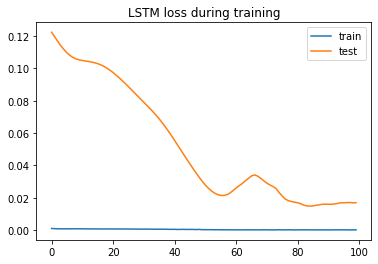

In [37]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("LSTM loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.00003652 MSE (0.00604312 RMSE ) , 86.71875002  ACC
Validation Score: 0.01692129 MSE (0.13008187 RMSE ) , 38.88888905  ACC


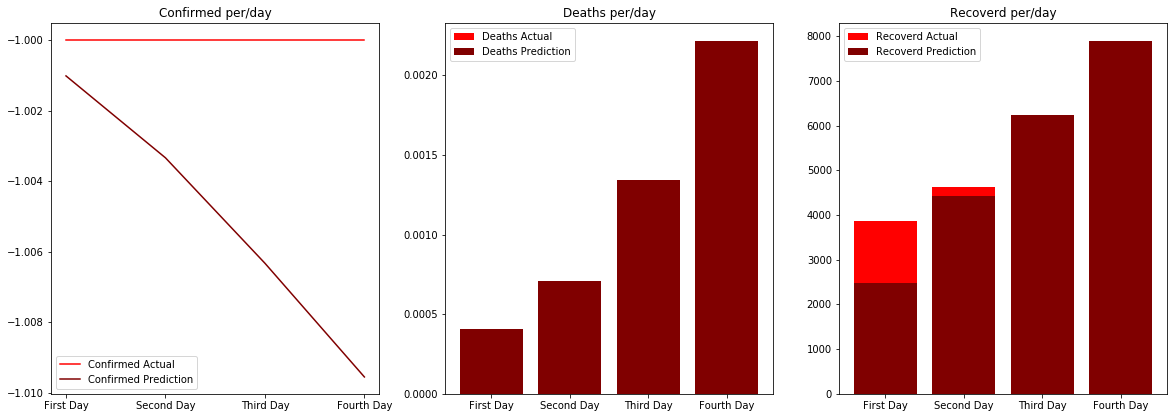

In [38]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# Seq2Seq

In [40]:
input_shape = (2, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 32 samples, validate on 9 samples
Epoch 1/100
32/32 [==============================] - 5s 168ms/step - loss: 9.4948e-04 - acc: 0.1250 - rmse: 0.0135 - mse: 9.4948e-04 - r_square: -0.1104 - val_loss: 0.1249 - val_acc: 0.1667 - val_rmse: 0.3094 - val_mse: 0.1249 - val_r_square: -0.7900
Epoch 2/100
32/32 [==============================] - 0s 925us/step - loss: 8.6928e-04 - acc: 0.7500 - rmse: 0.0145 - mse: 8.6928e-04 - r_square: -0.0166 - val_loss: 0.1218 - val_acc: 0.1667 - val_rmse: 0.3046 - val_mse: 0.1218 - val_r_square: -0.7448
Epoch 3/100
32/32 [==============================] - 0s 963us/step - loss: 8.0871e-04 - acc: 0.7812 - rmse: 0.0157 - mse: 8.0871e-04 - r_square: 0.0542 - val_loss: 0.1189 - val_acc: 0.1667 - val_rmse: 0.3002 - val_mse: 0.1189 - val_r_square: -0.7036
Epoch 4/100
32/32 [==============================] - 0s 955us/step - loss: 7.6850e-04 - acc: 0.8125 - rmse: 0.0170 - mse: 7.6850e-04 - r_square: 0.1013 - val_loss: 0.1158 - val_acc: 0.1667 - val_rmse: 0.29

Epoch 34/100
32/32 [==============================] - 0s 749us/step - loss: 5.5946e-04 - acc: 0.8203 - rmse: 0.0159 - mse: 5.5946e-04 - r_square: 0.3457 - val_loss: 0.0644 - val_acc: 0.1667 - val_rmse: 0.2147 - val_mse: 0.0644 - val_r_square: 0.0770
Epoch 35/100
32/32 [==============================] - 0s 686us/step - loss: 5.0414e-04 - acc: 0.8516 - rmse: 0.0154 - mse: 5.0414e-04 - r_square: 0.4104 - val_loss: 0.0622 - val_acc: 0.1667 - val_rmse: 0.2106 - val_mse: 0.0622 - val_r_square: 0.1094
Epoch 36/100
32/32 [==============================] - 0s 587us/step - loss: 5.3481e-04 - acc: 0.8281 - rmse: 0.0152 - mse: 5.3481e-04 - r_square: 0.3745 - val_loss: 0.0597 - val_acc: 0.1667 - val_rmse: 0.2059 - val_mse: 0.0597 - val_r_square: 0.1451
Epoch 37/100
32/32 [==============================] - 0s 528us/step - loss: 6.0792e-04 - acc: 0.7969 - rmse: 0.0151 - mse: 6.0792e-04 - r_square: 0.2890 - val_loss: 0.0571 - val_acc: 0.1667 - val_rmse: 0.2009 - val_mse: 0.0571 - val_r_square: 0.1822


Epoch 67/100
32/32 [==============================] - 0s 768us/step - loss: 3.3339e-04 - acc: 0.7812 - rmse: 0.0128 - mse: 3.3339e-04 - r_square: 0.6101 - val_loss: 0.0107 - val_acc: 0.1667 - val_rmse: 0.0891 - val_mse: 0.0107 - val_r_square: 0.8461
Epoch 68/100
32/32 [==============================] - 0s 725us/step - loss: 3.6107e-04 - acc: 0.8281 - rmse: 0.0105 - mse: 3.6107e-04 - r_square: 0.5777 - val_loss: 0.0106 - val_acc: 0.1667 - val_rmse: 0.0879 - val_mse: 0.0106 - val_r_square: 0.8477
Epoch 69/100
32/32 [==============================] - 0s 660us/step - loss: 2.0198e-04 - acc: 0.8281 - rmse: 0.0081 - mse: 2.0198e-04 - r_square: 0.7638 - val_loss: 0.0108 - val_acc: 0.1667 - val_rmse: 0.0881 - val_mse: 0.0108 - val_r_square: 0.8457
Epoch 70/100
32/32 [==============================] - 0s 618us/step - loss: 1.4129e-04 - acc: 0.7266 - rmse: 0.0076 - mse: 1.4129e-04 - r_square: 0.8348 - val_loss: 0.0110 - val_acc: 0.1667 - val_rmse: 0.0887 - val_mse: 0.0110 - val_r_square: 0.8427


Epoch 100/100
32/32 [==============================] - 0s 745us/step - loss: 3.7693e-04 - acc: 0.8281 - rmse: 0.0128 - mse: 3.7693e-04 - r_square: 0.5592 - val_loss: 0.0126 - val_acc: 0.8333 - val_rmse: 0.0898 - val_mse: 0.0126 - val_r_square: 0.8200


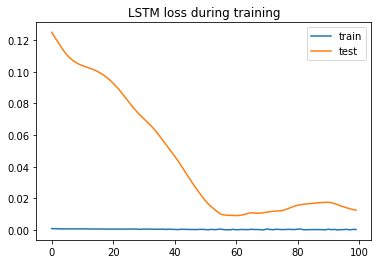

In [41]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("LSTM loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.00016612 MSE (0.01288886 RMSE ) , 84.37500021  ACC
Validation Score: 0.01256052 MSE (0.11207371 RMSE ) , 83.33333333  ACC


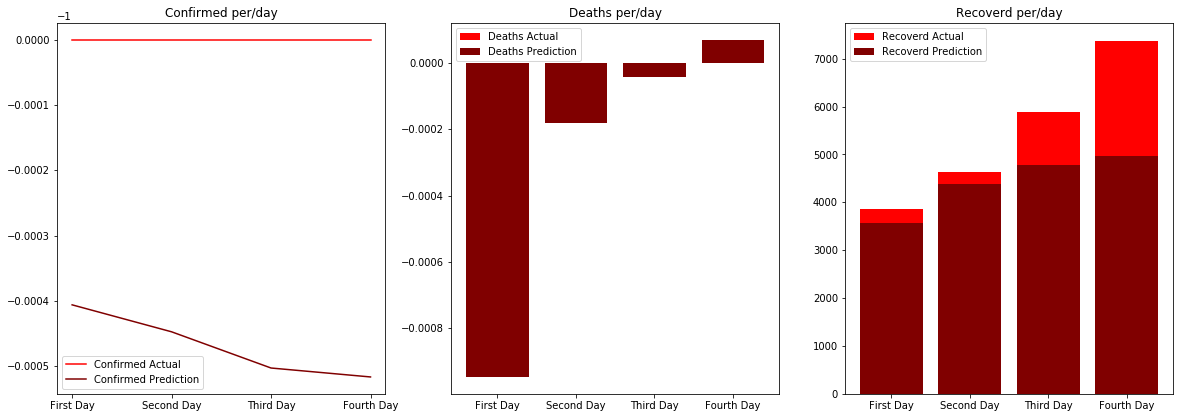

In [42]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# GRU

In [44]:
input_shape = (2, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 32 samples, validate on 9 samples
Epoch 1/100
32/32 [==============================] - 3s 109ms/step - loss: 9.0375e-04 - acc: 0.2500 - rmse: 0.0133 - mse: 9.0375e-04 - r_square: -0.0569 - val_loss: 0.1220 - val_acc: 0.0000e+00 - val_rmse: 0.3049 - val_mse: 0.1220 - val_r_square: -0.7486
Epoch 2/100
32/32 [==============================] - 0s 387us/step - loss: 8.0709e-04 - acc: 0.5312 - rmse: 0.0155 - mse: 8.0709e-04 - r_square: 0.0561 - val_loss: 0.1147 - val_acc: 0.1667 - val_rmse: 0.2944 - val_mse: 0.1147 - val_r_square: -0.6441
Epoch 3/100
32/32 [==============================] - 0s 555us/step - loss: 7.7873e-04 - acc: 0.6484 - rmse: 0.0183 - mse: 7.7873e-04 - r_square: 0.0893 - val_loss: 0.1091 - val_acc: 0.1667 - val_rmse: 0.2862 - val_mse: 0.1091 - val_r_square: -0.5634
Epoch 4/100
32/32 [==============================] - 0s 430us/step - loss: 7.1359e-04 - acc: 0.6562 - rmse: 0.0198 - mse: 7.1359e-04 - r_square: 0.1655 - val_loss: 0.1039 - val_acc: 0.3889 - val_rmse: 0

Epoch 34/100
32/32 [==============================] - 0s 411us/step - loss: 1.3002e-04 - acc: 0.6172 - rmse: 0.0080 - mse: 1.3002e-04 - r_square: 0.8479 - val_loss: 0.0111 - val_acc: 0.6944 - val_rmse: 0.0881 - val_mse: 0.0111 - val_r_square: 0.8411
Epoch 35/100
32/32 [==============================] - 0s 485us/step - loss: 1.5879e-04 - acc: 0.6797 - rmse: 0.0085 - mse: 1.5879e-04 - r_square: 0.8143 - val_loss: 0.0107 - val_acc: 0.7778 - val_rmse: 0.0865 - val_mse: 0.0107 - val_r_square: 0.8467
Epoch 36/100
32/32 [==============================] - 0s 500us/step - loss: 1.5530e-04 - acc: 0.6484 - rmse: 0.0081 - mse: 1.5530e-04 - r_square: 0.8184 - val_loss: 0.0107 - val_acc: 0.8056 - val_rmse: 0.0866 - val_mse: 0.0107 - val_r_square: 0.8466
Epoch 37/100
32/32 [==============================] - 0s 523us/step - loss: 1.1391e-04 - acc: 0.7188 - rmse: 0.0075 - mse: 1.1391e-04 - r_square: 0.8668 - val_loss: 0.0112 - val_acc: 0.8333 - val_rmse: 0.0888 - val_mse: 0.0112 - val_r_square: 0.8392


Epoch 67/100
32/32 [==============================] - 0s 361us/step - loss: 1.2506e-04 - acc: 0.7656 - rmse: 0.0086 - mse: 1.2506e-04 - r_square: 0.8537 - val_loss: 0.0108 - val_acc: 0.4167 - val_rmse: 0.0868 - val_mse: 0.0108 - val_r_square: 0.8460
Epoch 68/100
32/32 [==============================] - 0s 355us/step - loss: 7.9611e-05 - acc: 0.7422 - rmse: 0.0065 - mse: 7.9611e-05 - r_square: 0.9069 - val_loss: 0.0106 - val_acc: 0.3889 - val_rmse: 0.0863 - val_mse: 0.0106 - val_r_square: 0.8480
Epoch 69/100
32/32 [==============================] - 0s 442us/step - loss: 1.0979e-04 - acc: 0.5547 - rmse: 0.0070 - mse: 1.0979e-04 - r_square: 0.8716 - val_loss: 0.0105 - val_acc: 0.3889 - val_rmse: 0.0861 - val_mse: 0.0105 - val_r_square: 0.8490
Epoch 70/100
32/32 [==============================] - 0s 422us/step - loss: 1.2731e-04 - acc: 0.5469 - rmse: 0.0074 - mse: 1.2731e-04 - r_square: 0.8511 - val_loss: 0.0105 - val_acc: 0.3611 - val_rmse: 0.0858 - val_mse: 0.0105 - val_r_square: 0.8499


Epoch 100/100
32/32 [==============================] - 0s 519us/step - loss: 7.1552e-05 - acc: 0.6328 - rmse: 0.0059 - mse: 7.1552e-05 - r_square: 0.9163 - val_loss: 0.0137 - val_acc: 0.5000 - val_rmse: 0.0979 - val_mse: 0.0137 - val_r_square: 0.8038


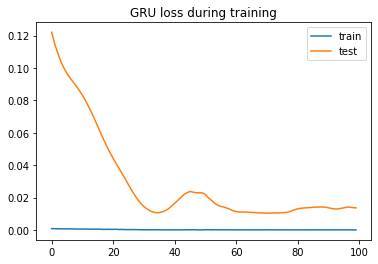

In [45]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("GRU loss during training")
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.00003350 MSE (0.00578797 RMSE ) , 58.59375028  ACC
Validation Score: 0.01369286 MSE (0.11701648 RMSE ) , 50.00000075  ACC


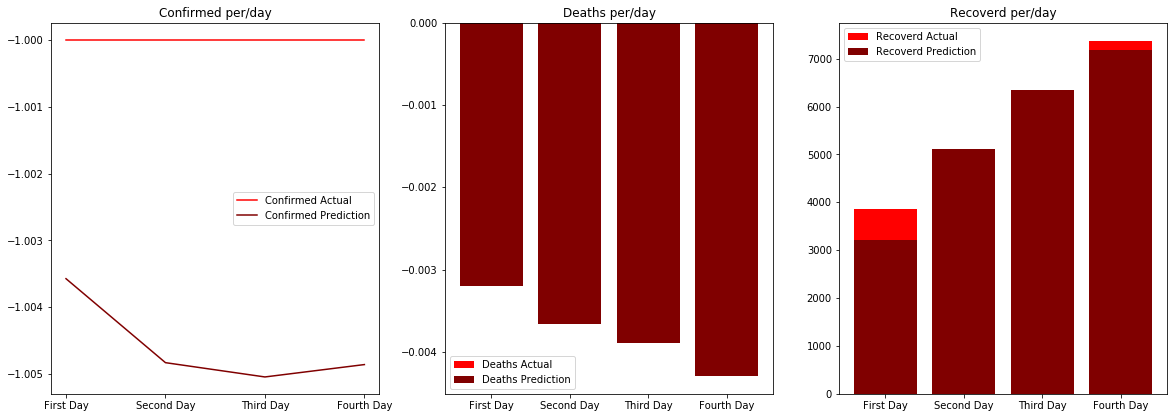

In [46]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()